In [56]:
#this code is run on colab
import random
import matplotlib.pyplot as plt

In [2]:
!cp "/content/drive/MyDrive/P06_c.txt" "./"
!cp "/content/drive/MyDrive/P06_p.txt" "./"
!cp "/content/drive/MyDrive/P06_w.txt" "./"

In [5]:
f=open("./P06_p.txt")

exprofit=f.read().splitlines()
exprofit=[int(x) for x in exprofit]
f.close()

In [6]:
f=open("./P06_w.txt")
exweight=f.read().splitlines()
exweight=[int(x) for x in exweight]
f.close()

In [7]:
f=open("./P06_c.txt")
excapcity=f.read().splitlines()
excapcity=int(excapcity[0])
f.close()

In [8]:
#indivual_list here is [0/1] list for an indivual, this function restrain x in domain f=[0,capcity] to return result(profit sum), or it will return 0 for this problem is maximum problem
def knapsack_func_sign_extend(indivual_list,cap,profit,weight):
  vsum=0
  wsum=0
  for i in range(0,len(indivual_list)):
    if indivual_list[i]==1:
      vsum+=profit[i]
      wsum+=weight[i]
  if wsum>cap:
    return 0
  else :
    return vsum




In [9]:
#profit,weight are list read from txt, this code will randomly generate a fucton value>0 solution
def random_generattion(cap,profit,weight):
  a=[random.randint(0,1) for i in range(0,len(profit))]
  while knapsack_func_sign_extend(a,cap,profit,weight)==0:
    a=[random.randint(0,1) for i in range(0,len(profit))]
  return a



In [36]:
#for generate 1 step climbing for current point(define: 1 steps climbing with only 1 position different with current result)
def climbing(indivual_list,climb_point):
  aa=[]
  for i in range(0,len(indivual_list)):
    aa.append(indivual_list[i])
  if aa[climb_point]==0:
    aa[climb_point]=1
  else :
    aa[climb_point]=0
  return aa

In [41]:
#for generate all climbing result for current point
def neighbor_gen(indivual_list,cap,profit,weight):
  new_pop_list=[]
  for i in range(0,len(indivual_list)):
    a_climb=climbing(indivual_list,i)
    new_pop_list.append(a_climb)
  new_pop_list=sorted(new_pop_list,reverse=True,key=lambda x: knapsack_func_sign_extend(x,cap,profit,weight))

  return new_pop_list




In [53]:
#this run for total number of iterations, each steps except first run:
 #1.  for current point generate all climb result, sort via function value
 #2.  compare largest function value solution's function value with best_solution among test solution
 #3.  if this climbing generate better result, we update it as best_solution
 #4.  to keep from stuck in local maxima, we choose random start strategy, in each turn, if a random value is smaller than random_start_rate(here=0.4) we random choose a point as next iteration's start point
def random_start_climb(iter_num,cap,profit,weight,random_rate):

  opt_sol=random_generattion(cap,profit,weight)
  best_recored=[knapsack_func_sign_extend(opt_sol,cap,profit,weight)]
  best_sol_list=[opt_sol]
  for i in range(0,iter_num-1):
    how_climb=neighbor_gen(opt_sol,cap,profit,weight)
    if knapsack_func_sign_extend(how_climb[0],cap,profit,weight) >= knapsack_func_sign_extend(best_sol_list[i],cap,profit,weight):
      best_sol_list.append(how_climb[0])
      best_recored.append(knapsack_func_sign_extend(how_climb[0],cap,profit,weight))
    else :
      best_sol_list.append(best_sol_list[i])
      best_recored.append(knapsack_func_sign_extend(best_sol_list[i],cap,profit,weight))
    if random_rate>random.random():
      opt_sol=random_generattion(cap,profit,weight)
    else:
      opt_sol=best_sol_list[i+1]



  tot_sol_list=[best_recored[len(best_recored)-1],best_recored,best_sol_list]
  return tot_sol_list



In [54]:
anss=random_start_climb(100,170,exprofit,exweight,0.4)

In [ ]:
anss[1]

Text(0, 0.5, 'profit')

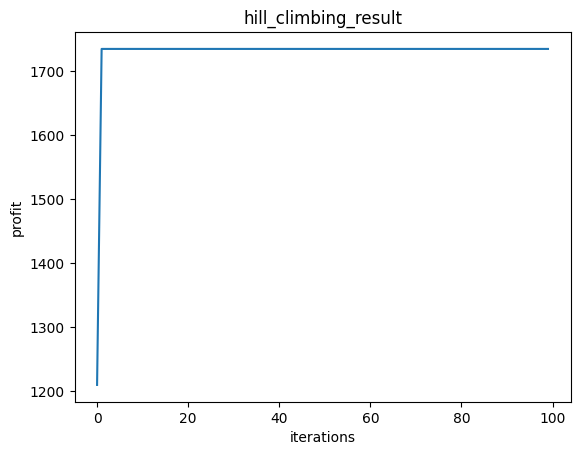

In [59]:
plt.plot(anss[1])
plt.title("hill_climbing_result")
plt.xlabel("iterations")
plt.ylabel("profit")